Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive reviews and negative reviews, just based on the text content of the reviews.
Use IMDB dataset.

In [92]:
import pandas as pd
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [93]:
# Step 2: Load Dataset from CSV
df = pd.read_csv("imdb_master.csv", encoding='ISO-8859-1') 
print(df.head())

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [94]:
df=df.drop(["Unnamed: 0"],axis=1)

In [95]:
df=df.drop(["file"],axis=1)

In [96]:
df

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg
...,...,...,...
99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,train,"Watching Time Chasers, it obvious that it was ...",unsup
99997,train,At the beginning we can see members of Troma t...,unsup
99998,train,"The movie was incredible, ever since I saw it ...",unsup


In [97]:
print(df['label'].value_counts())


label
unsup    50000
neg      25000
pos      25000
Name: count, dtype: int64


In [98]:
df = df.query("type == 'train' and label in ['pos', 'neg']")

In [99]:
print(df['label'].value_counts())


label
neg    12500
pos    12500
Name: count, dtype: int64


In [100]:
texts = df['review']
y = LabelEncoder().fit_transform(df['label'])

In [101]:
# Step 4: Tokenization and Padding
vocab_size = 10000
maxlen = 200

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts) # Learns the word index based on frequency.
X = tokenizer.texts_to_sequences(texts) #: Converts each sentence to a list of word indices.
X = pad_sequences(X, maxlen=maxlen)


In [102]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [111]:
Sequential?

Init signature: Sequential(*args, **kwargs)
Docstring:     
`Sequential` groups a linear stack of layers into a `Model`.

Examples:

```python
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))
len(model.weights)  # Returns "2"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64,validation_data=(X_test, y_test))



Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6271 - loss: 0.6435 - val_accuracy: 0.8384 - val_loss: 0.3733
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8592 - loss: 0.3353 - val_accuracy: 0.8756 - val_loss: 0.2964
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9063 - loss: 0.2432 - val_accuracy: 0.8846 - val_loss: 0.2858
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9262 - loss: 0.2044 - val_accuracy: 0.8690 - val_loss: 0.3150
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9436 - loss: 0.1663 - val_accuracy: 0.8758 - val_loss: 0.3129
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3104


In [106]:
# Evaluate
accuracy = model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.3104


In [107]:
predictions = (model.predict(X_test[:5]) > 0.5).astype(int)

# Display results
for i in range(5):
    print(f"Predicted: {'Positive' if predictions[i] == 1 else 'Negative'} | Actual: {'Positive' if y_test[i] == 1 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted: Negative | Actual: Negative
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Negative
Predicted: Negative | Actual: Positive
Predicted: Positive | Actual: Positive


<Axes: ylabel='Count'>

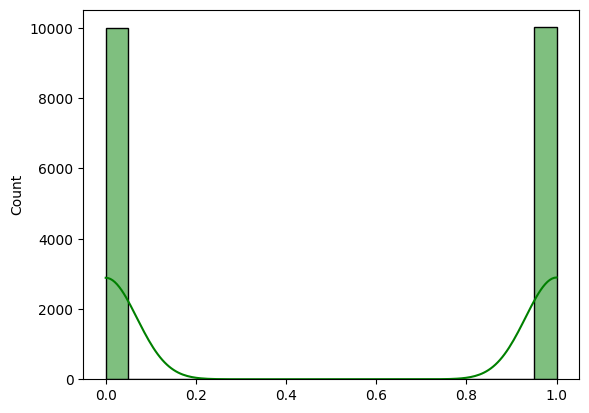

In [108]:
import seaborn as sns

sns.histplot(y_train, bins=20, kde=True, color='green')